Dataset shape: (10015, 7)
Columns: ['lesion_id', 'image_id', 'dx', 'dx_type', 'age', 'sex', 'localization']

First 5 rows:


,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


=== DATASET OVERVIEW ===
Total number of samples: 10015
Number of features: 7

=== COLUMN INFORMATION ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           9958 non-null   float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
dtypes: float64(1), object(6)
memory usage: 547.8+ KB

=== MISSING VALUES ===
     Missing Count
age             57

=== BASIC STATISTICS ===
          lesion_id      image_id     dx dx_type          age    sex  \
count         10015         10015  10015   10015  9958.000000  10015   
unique         7470         10015      7       4          NaN      3   
top     HAM_0005263  ISIC_0032258     nv 

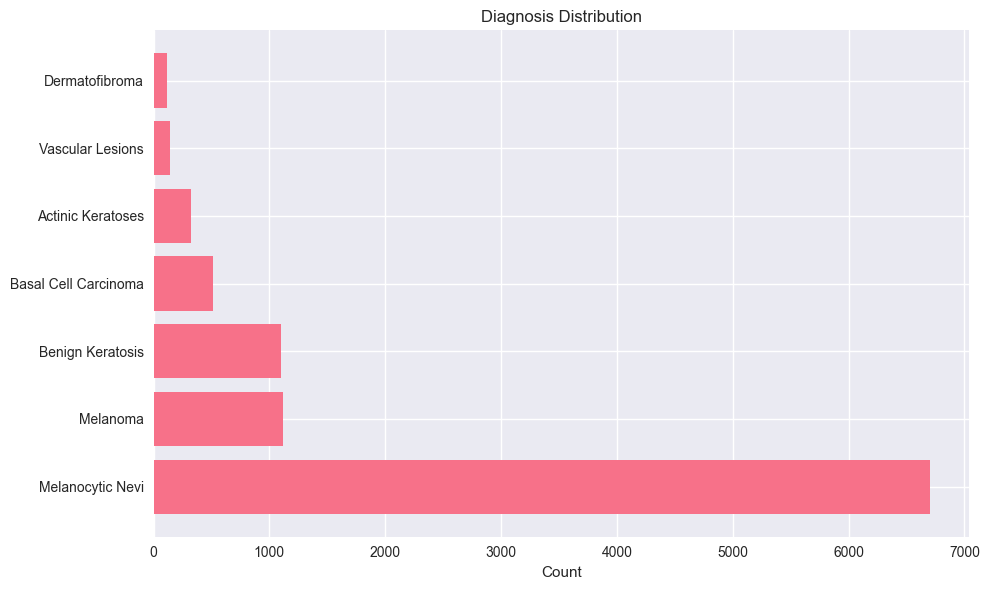


Class Imbalance Analysis:
Most common class: nv (6705 samples)
Least common class: df (115 samples)
Imbalance ratio: 58.30:1
=== DIAGNOSIS TYPE (dx_type) ANALYSIS ===
Diagnosis Type Distribution:
dx_type
histo        5340
follow_up    3704
consensus     902
confocal       69
Name: count, dtype: int64

Diagnosis Type Meanings:
  histo: Histopathology (5340 cases)
  follow_up: Follow-up (3704 cases)
  consensus: Expert Consensus (902 cases)
  confocal: Confocal Microscopy (69 cases)

=== DIAGNOSIS TYPE vs DIAGNOSIS ANALYSIS ===
Cross-tabulation of Diagnosis vs Diagnosis Type:
dx_type  confocal  consensus  follow_up  histo
dx                                            
akiec           0          0          0    327
bcc             0          0          0    514
bkl            69        264          0    766
df              0         60          0     55
mel             0          0          0   1113
nv              0        503       3704   2498
vasc            0         75          0   

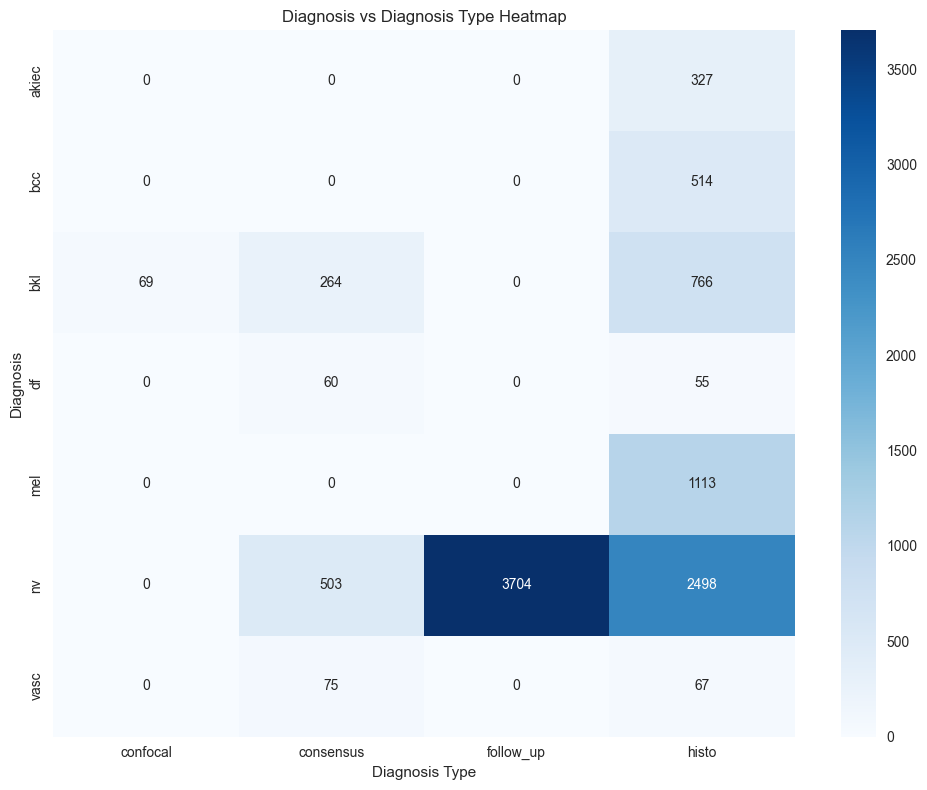

<Figure size 1200x800 with 0 Axes>

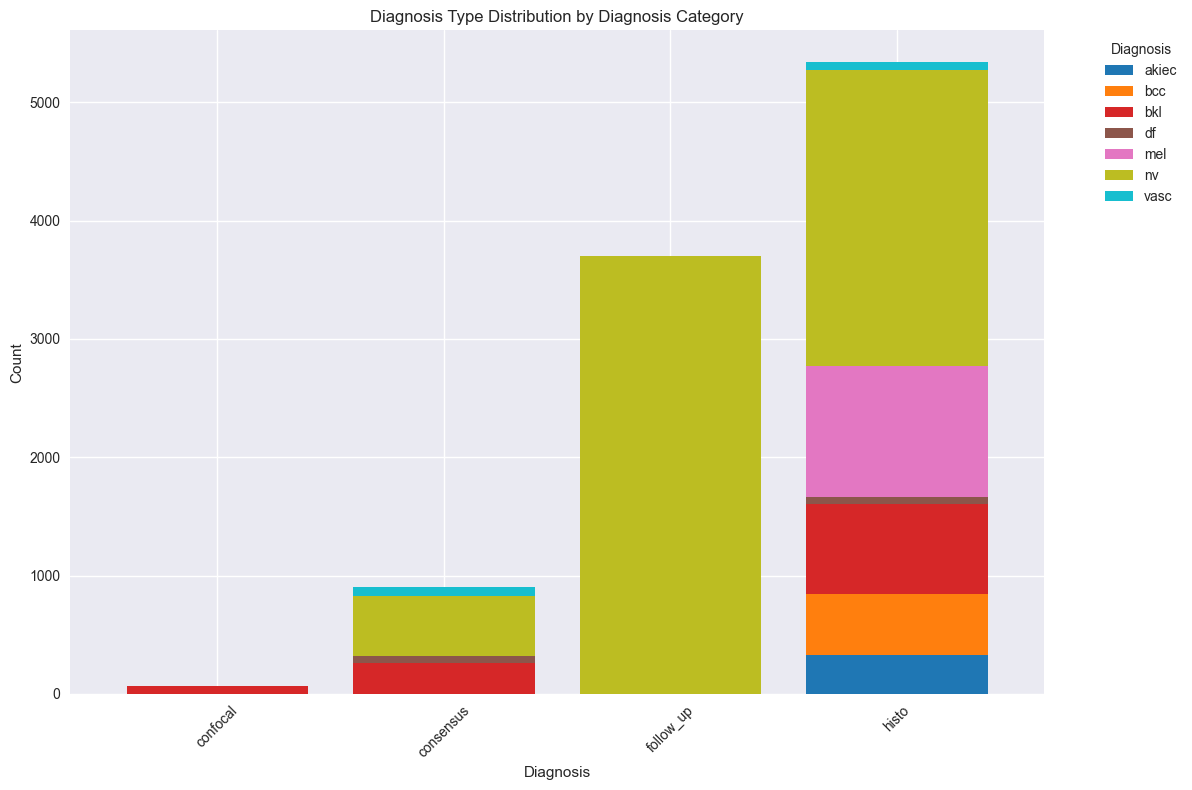


=== DIAGNOSIS RELIABILITY ANALYSIS ===
Reliability ranking (from most to least reliable):
1. Histopathology (histo): 5340 cases
2. Confocal Microscopy (confocal): 69 cases
3. Expert Consensus (consensus): 902 cases
4. Follow-up (follow_up): 3704 cases

Most reliably confirmed diagnoses (histopathology %):
  Melanoma (mel): 100.0% histologically confirmed
  Actinic Keratoses (akiec): 100.0% histologically confirmed
  Basal Cell Carcinoma (bcc): 100.0% histologically confirmed
  Benign Keratosis (bkl): 69.7% histologically confirmed
  Dermatofibroma (df): 47.8% histologically confirmed
  Vascular Lesions (vasc): 47.2% histologically confirmed
  Melanocytic Nevi (nv): 37.3% histologically confirmed
=== PATIENT DEMOGRAPHICS ANALYSIS ===
Age Statistics:
count    9958.000000
mean       51.863828
std        16.968614
min         0.000000
25%        40.000000
50%        50.000000
75%        65.000000
max        85.000000
Name: age, dtype: float64

Sex Distribution:
sex
male       5406
female 

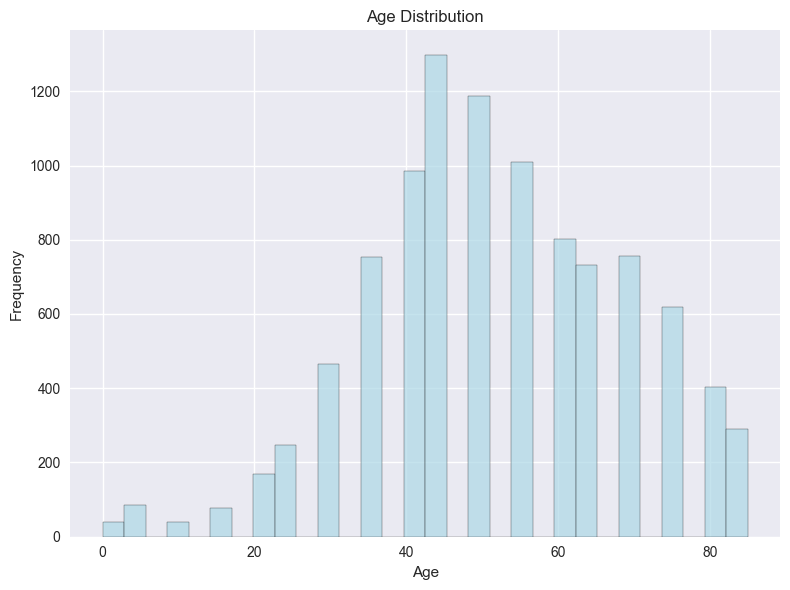

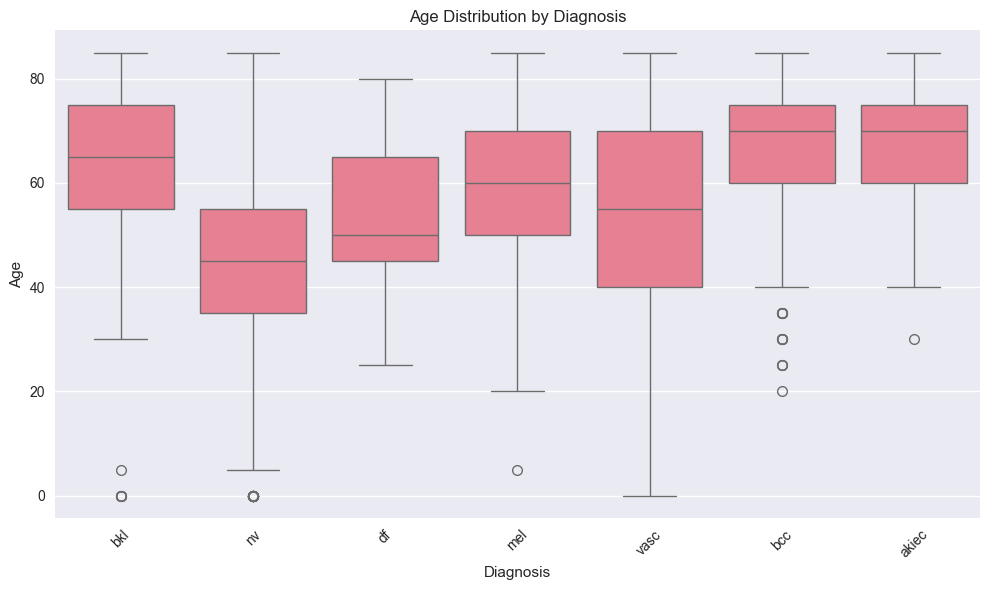

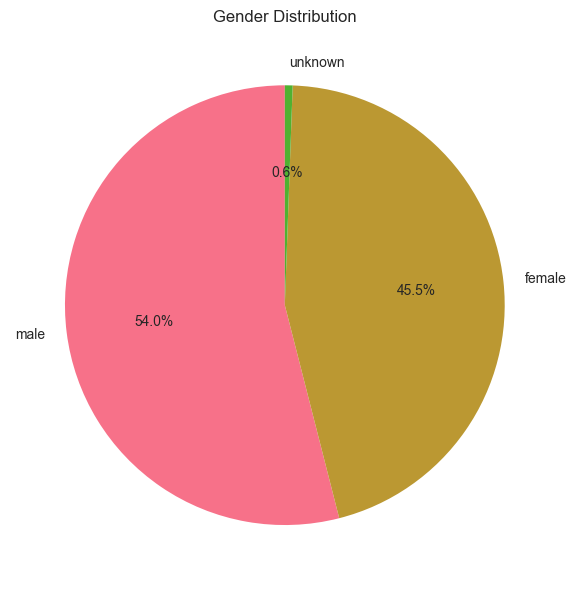

<Figure size 1000x600 with 0 Axes>

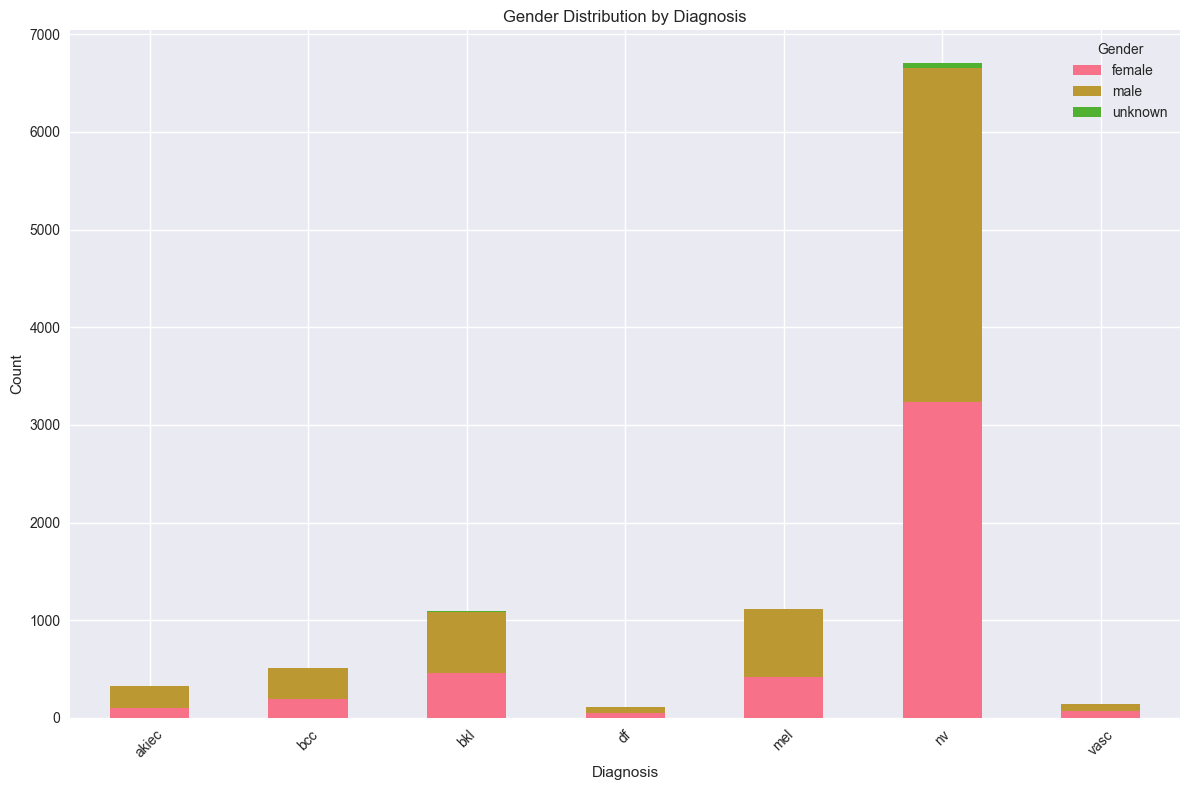

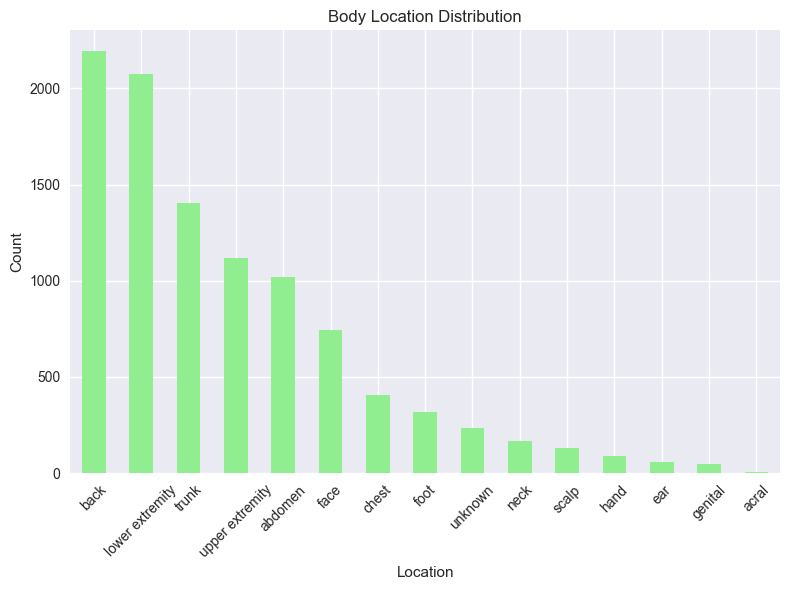

=== ADVANCED DEMOGRAPHIC ANALYSIS ===
Age Group Distribution:
age_group
Older (50-69)          3730
Middle-aged (30-49)    3501
Elderly (70+)          2068
Young (0-29)            659
Unknown                  57
Name: count, dtype: int64

=== CROSS-TABULATION ANALYSIS ===
Diagnosis by Age Group:
age_group  Elderly (70+)  Middle-aged (30-49)  Older (50-69)  Unknown  \
dx                                                                      
akiec                165                   20            142        0   
bcc                  286                   58            166        0   
bkl                  527                  135            421       10   
df                    16                   39             58        0   
mel                  418                  193            477        2   
nv                   615                 3024           2419       45   
vasc                  41                   32             47        0   

age_group  Young (0-29)  
dx                 

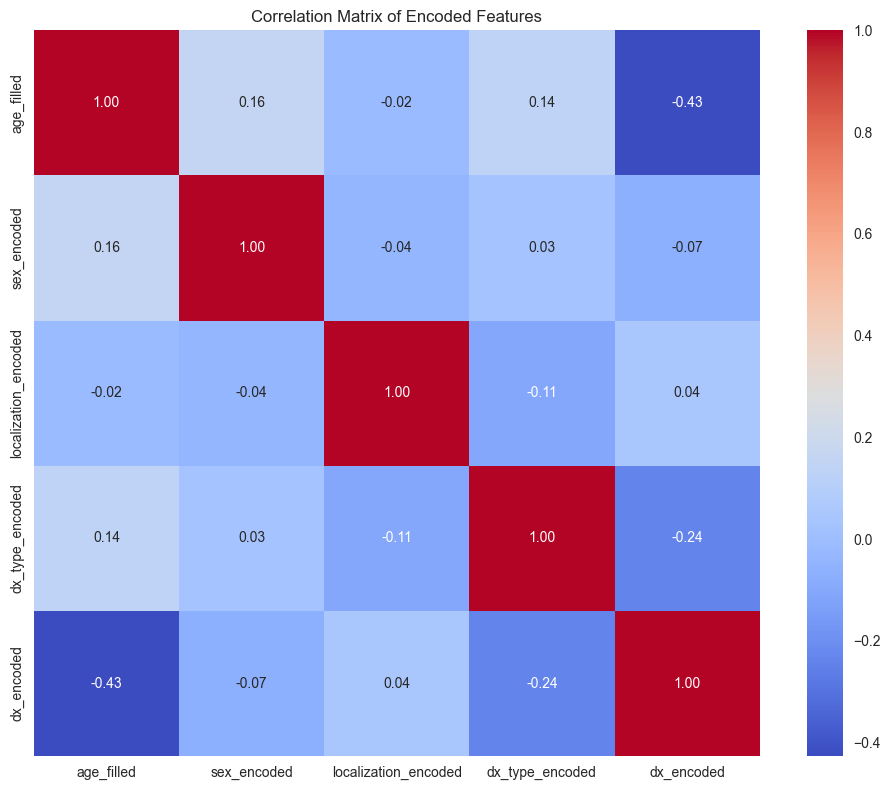

Correlation Analysis:
                      age_filled  sex_encoded  localization_encoded  \
age_filled              1.000000     0.163171             -0.015514   
sex_encoded             0.163171     1.000000             -0.039845   
localization_encoded   -0.015514    -0.039845              1.000000   
dx_type_encoded         0.140546     0.025853             -0.105914   
dx_encoded             -0.426755    -0.073130              0.042260   

                      dx_type_encoded  dx_encoded  
age_filled                   0.140546   -0.426755  
sex_encoded                  0.025853   -0.073130  
localization_encoded        -0.105914    0.042260  
dx_type_encoded              1.000000   -0.238336  
dx_encoded                  -0.238336    1.000000  

HAM10000_images_part_1:
Number of images: 5000
Sample filenames: ['ISIC_0024306.jpg', 'ISIC_0024307.jpg', 'ISIC_0024308.jpg', 'ISIC_0024309.jpg', 'ISIC_0024310.jpg']

HAM10000_images_part_2:
Number of images: 5015
Sample filenames: ['ISIC

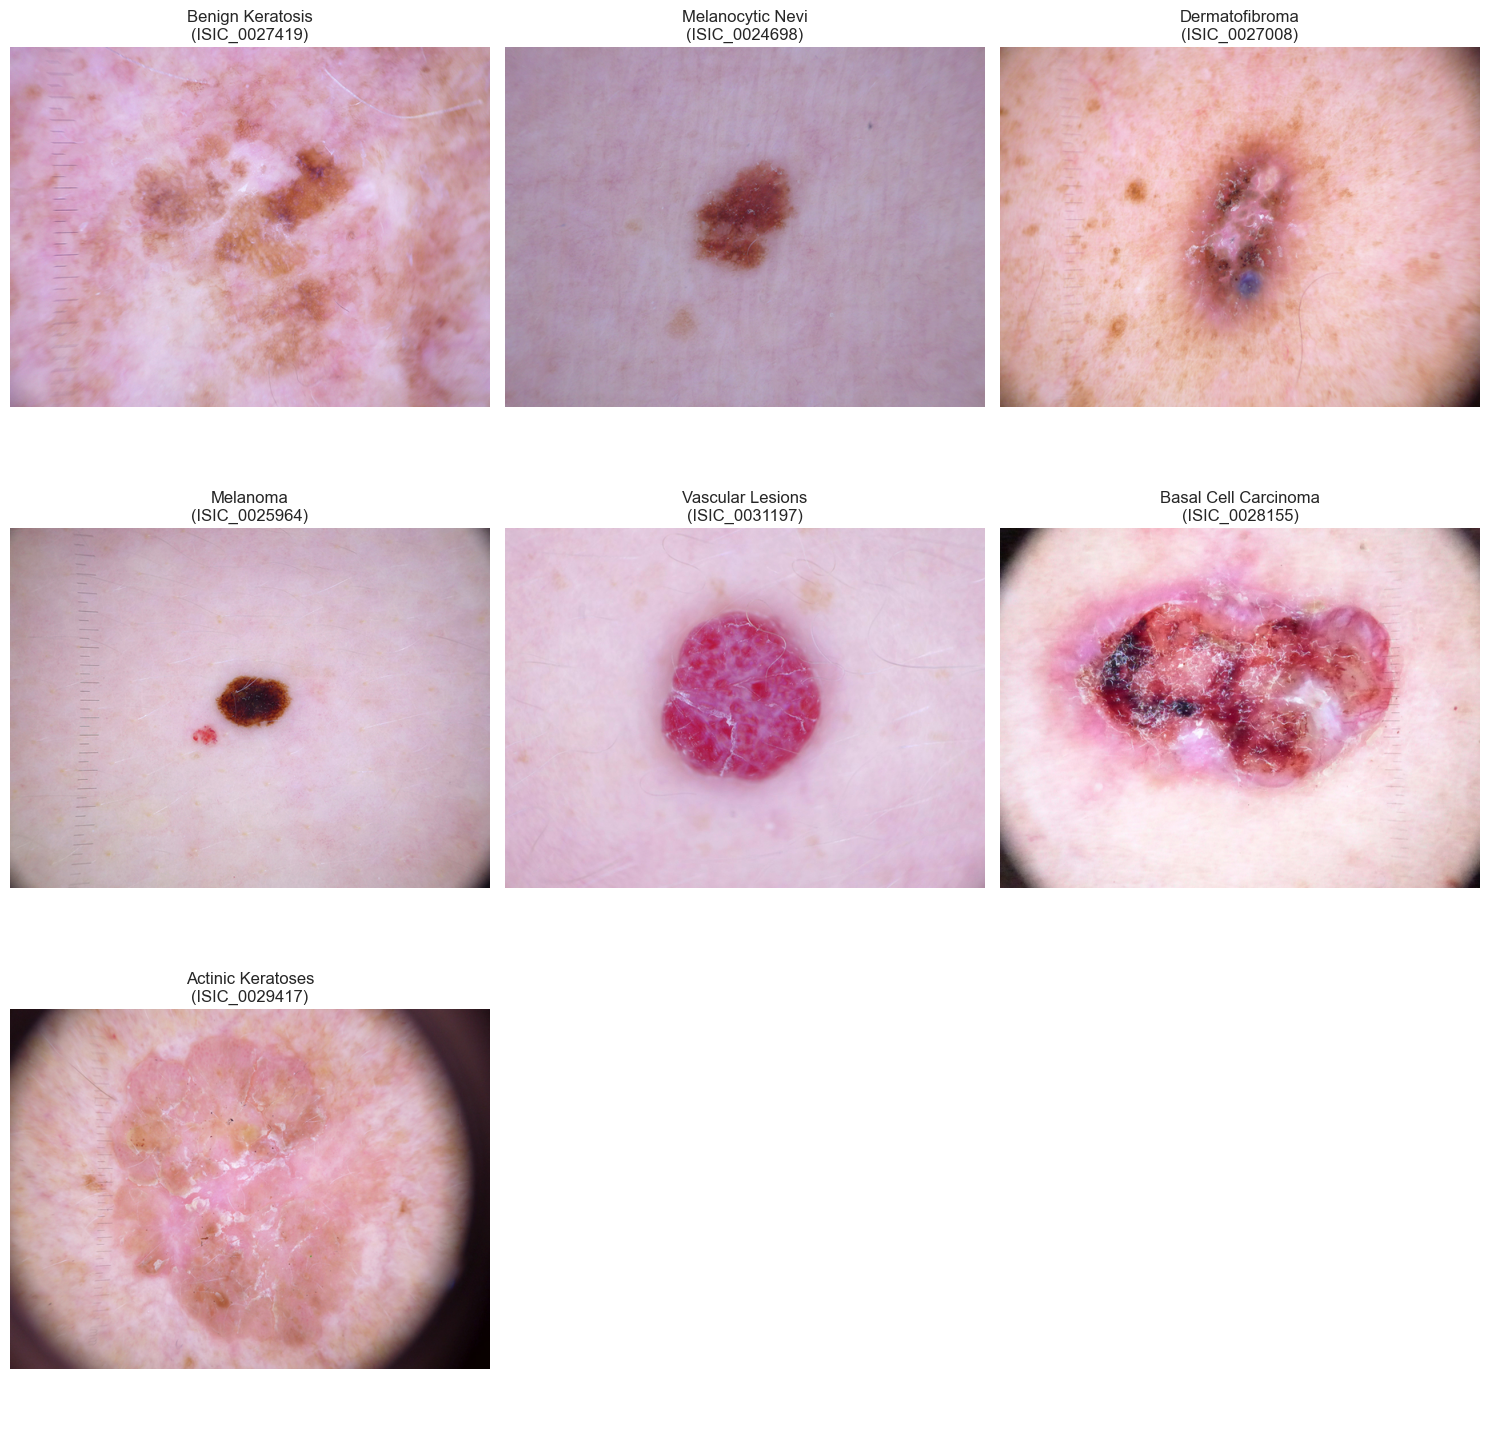

In [1]:
# Connect to Data_Viz.ipynb - Load the same data and variables
%run Data_Viz.ipynb

In [2]:
# Import libraries
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import os
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Configuration
IMG_WIDTH = 128
IMG_HEIGHT = 128
TEST_SIZE = 0.2
VAL_SIZE = 0.1
RANDOM_STATE = 42
BATCH_SIZE = 32

In [4]:
DATA_PATH = './'
IMAGES_PATH_1 = DATA_PATH + '/HAM10000_images_part_1'
IMAGES_PATH_2 = DATA_PATH + '/HAM10000_images_part_2'
METADATA_PATH = DATA_PATH + '/HAM10000_metadata.csv'

In [5]:
metadata = pd.read_csv(METADATA_PATH)
images_dir_1 = Path(IMAGES_PATH_1)
images_dir_2 = Path(IMAGES_PATH_2)

In [6]:
print(f"Dataset shape: {metadata.shape}")

Dataset shape: (10015, 7)


In [7]:
print(f"\nDiagnosis distribution:")
print(metadata['dx'].value_counts())


Diagnosis distribution:
dx
nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: count, dtype: int64


In [8]:
print(f"\nMissing values:")
print(metadata.isnull().sum())


Missing values:
lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
dtype: int64


In [9]:
metadata.age.fillna((metadata.age.mean()), inplace=True)
metadata.isnull().sum()

lesion_id       0
image_id        0
dx              0
dx_type         0
age             0
sex             0
localization    0
dtype: int64

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'nv'),
  Text(1, 0, 'mel'),
  Text(2, 0, 'bkl'),
  Text(3, 0, 'bcc'),
  Text(4, 0, 'akiec'),
  Text(5, 0, 'vasc'),
  Text(6, 0, 'df')])

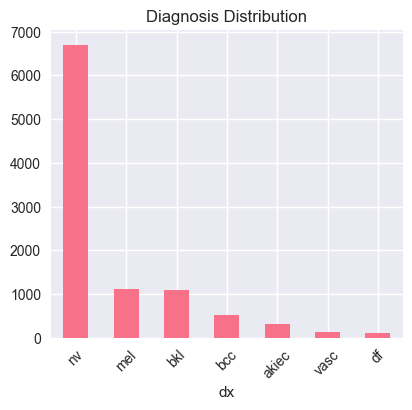

In [10]:
# Visualize class distribution
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
metadata['dx'].value_counts().plot(kind='bar')
plt.title('Diagnosis Distribution')
plt.xticks(rotation=45)

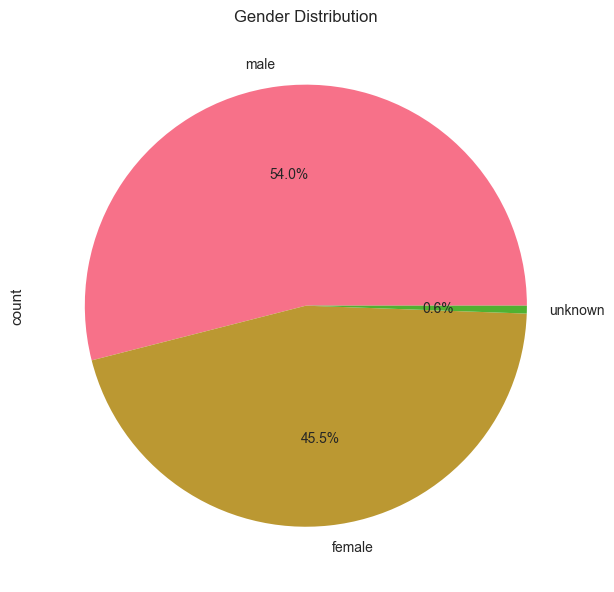

In [11]:
plt.subplot(1, 2, 2)
metadata['sex'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.tight_layout()
plt.show()

In [12]:
# Split the data
print("Splitting data...")
train_val_data, test_data = train_test_split(
    metadata, test_size=TEST_SIZE, random_state=RANDOM_STATE, stratify=metadata['dx']
)

train_data, val_data = train_test_split(
    train_val_data, test_size=VAL_SIZE/(1-TEST_SIZE), 
    random_state=RANDOM_STATE, stratify=train_val_data['dx']
)

print(f"Train: {len(train_data)}, Val: {len(val_data)}, Test: {len(test_data)}")

Splitting data...
Train: 7010, Val: 1002, Test: 2003


In [15]:
# Image dimensions
IMG_WIDTH = 64
IMG_HEIGHT = 64

# Image preprocessing function
def preprocess_images_mlp(image_ids):
    """Load and preprocess images for classical ML"""
    processed_images = []

    for i, image_id in enumerate(image_ids):
        if i % 1000 == 0:
            print(f"Processed {i}/{len(image_ids)} images")

        # Finding the image in both folders
        image_path = None
        for ext in ['.jpg', '.jpeg', '.png']:
            for folder in [Path(IMAGES_PATH_1), Path(IMAGES_PATH_2)]:
                potential_path = folder / f"{image_id}{ext}"
                if potential_path.exists():
                    image_path = potential_path
                    break
            if image_path:  # stop if found
                break

        # If image not found, insert blank
        if image_path is None:
            processed_images.append(np.zeros((IMG_HEIGHT * IMG_WIDTH * 3,)))
            continue

        # Load and preprocess image
        try:
            image = Image.open(image_path).convert('RGB')
            image = image.resize((IMG_WIDTH, IMG_HEIGHT), Image.Resampling.LANCZOS)
            image_array = np.asarray(image, dtype=np.float32)
            flattened_image = image_array.flatten()
            processed_images.append(flattened_image)

        except Exception as e:
            print(f"Error processing {image_id}: {e}")
            processed_images.append(np.zeros((IMG_HEIGHT * IMG_WIDTH * 3,)))

    # Normalize image data to [0, 1]
    processed_images = np.array(processed_images) / 255.0
    print(f"Images shape: {processed_images.shape}")
    return processed_images

In [ ]:
# Process all image sets
print("=== Processing Images ===")
train_images = preprocess_images_mlp(train_data['image_id'].tolist())
val_images = preprocess_images_mlp(val_data['image_id'].tolist())
test_images = preprocess_images_mlp(test_data['image_id'].tolist())

# Flatten images for MLP input
train_images_flat = train_images.reshape(train_images.shape[0], -1)
val_images_flat = val_images.reshape(val_images.shape[0], -1)
test_images_flat = test_images.reshape(test_images.shape[0], -1)

print(f"Flattened images shape: {train_images_flat.shape}")

=== Processing Images ===
Processed 0/7010 images
Processed 1000/7010 images
Processed 2000/7010 images
Processed 3000/7010 images
Processed 4000/7010 images
Processed 5000/7010 images
Processed 6000/7010 images
Processed 7000/7010 images
Images shape: (7010, 12288)
Processed 0/1002 images
Processed 1000/1002 images
Images shape: (1002, 12288)
Processed 0/2003 images
Processed 1000/2003 images
Processed 2000/2003 images
Images shape: (2003, 12288)
Flattened images shape: (7010, 12288)


In [17]:
# Metadata preprocessing
def preprocess_metadata_mlp(data_subset):
    """Preprocess metadata for MLP"""
    processed = data_subset.copy()
    
    # Fill missing ages with median
    processed['age'] = processed['age'].fillna(processed['age'].median())
    
    # Encode sex: male=1, female=0, unknown=-1
    sex_mapping = {'male': 1, 'female': 0, 'unknown': -1}
    processed['sex_encoded'] = processed['sex'].map(sex_mapping).fillna(-1)
    
    # One-hot encode localization
    localization_dummies = pd.get_dummies(processed['localization'], prefix='loc')
    
    # Combine features
    features = pd.concat([
        processed[['age', 'sex_encoded']], 
        localization_dummies
    ], axis=1)
    
    return features.values

In [18]:
# Process and scale metadata
print("=== Processing Metadata ===")
train_metadata_raw = preprocess_metadata_mlp(train_data)
val_metadata_raw = preprocess_metadata_mlp(val_data)
test_metadata_raw = preprocess_metadata_mlp(test_data)

# Scale metadata features
metadata_scaler = StandardScaler()
train_metadata = metadata_scaler.fit_transform(train_metadata_raw)
val_metadata = metadata_scaler.transform(val_metadata_raw)
test_metadata = metadata_scaler.transform(test_metadata_raw)

print(f"Metadata shape: {train_metadata.shape}")

=== Processing Metadata ===
Metadata shape: (7010, 17)


In [19]:
# Scale images and prepare labels for MLP
print("=== Scaling Images & Preparing Labels ===")

# Scale image features
image_scaler = StandardScaler()
train_images_flat = image_scaler.fit_transform(train_images_flat)
val_images_flat = image_scaler.transform(val_images_flat)
test_images_flat = image_scaler.transform(test_images_flat)

# Encode and one-hot encode labels for multi-class classification
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_data['dx'])
val_labels_encoded = label_encoder.transform(val_data['dx'])
test_labels_encoded = label_encoder.transform(test_data['dx'])

# One-hot encode for categorical crossentropy
num_classes = len(label_encoder.classes_)
train_labels = to_categorical(train_labels_encoded, num_classes)
val_labels = to_categorical(val_labels_encoded, num_classes)
test_labels = to_categorical(test_labels_encoded, num_classes)

print(f"Classes: {label_encoder.classes_}")
print(f"Number of classes: {num_classes}")
print(f"One-hot labels shape: {train_labels.shape}")

=== Scaling Images & Preparing Labels ===
Classes: ['akiec' 'bcc' 'bkl' 'df' 'mel' 'nv' 'vasc']
Number of classes: 7
One-hot labels shape: (7010, 7)


In [20]:
# Combine features for MLP
print("=== Combining Features ===")
train_combined = np.hstack([train_images_flat, train_metadata])
val_combined = np.hstack([val_images_flat, val_metadata])
test_combined = np.hstack([test_images_flat, test_metadata])

print("Final shapes:")
print(f"Images only - Train: {train_images_flat.shape}")
print(f"Metadata only - Train: {train_metadata.shape}")
print(f"Combined - Train: {train_combined.shape}")
print(f"Labels - Train: {train_labels.shape}")

=== Combining Features ===
Final shapes:
Images only - Train: (7010, 12288)
Metadata only - Train: (7010, 17)
Combined - Train: (7010, 12305)
Labels - Train: (7010, 7)


In [30]:
# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1,
    fill_mode='nearest'
)

print("Data augmentation generator created")

Data augmentation generator created


In [22]:
# Building the MLP model
def create_mlp_model(input_dim, num_classes):
    """Create MLP model for skin lesion classification"""
    model = Sequential([
        # Input layer
        Dense(1024, activation='relu', input_dim=input_dim),
        BatchNormalization(),
        Dropout(0.3),
        
        # Hidden layers
        Dense(512, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        
        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(0.2),
        
        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(0.2),
        
        # Output layer
        Dense(num_classes, activation='softmax')
    ])
    
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model

# Creating the model
input_dim = train_combined.shape[1]  # Combined features dimension
model = create_mlp_model(input_dim, num_classes)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1024)           │    12,601,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,298,951 (50.73 MB)

 Trainable params: 13,295,111 (50.72 MB)

 Non-trainable params: 3,840 (15.00 KB)

In [32]:
# === Metadata MLP ===
print("\n=== Training MLP on Metadata ===")
input_dim_meta = train_metadata.shape[1]
model_meta = create_mlp_model(input_dim_meta, num_classes)

history_meta = model_meta.fit(
    train_metadata, train_labels,
    validation_data=(val_metadata, val_labels),
    epochs=100,
    batch_size=BATCH_SIZE,
    callbacks=callbacks,
    verbose=1
)


=== Training MLP on Metadata ===
Epoch 1/100
220/220 ━━━━━━━━━━━━━━━━━━━━ 15s 27ms/step - accuracy: 0.4928 - loss: 1.7651 - val_accuracy: 0.6806 - val_loss: 1.0336 - learning_rate: 0.0010
Epoch 2/100
220/220 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.6629 - loss: 1.1004 - val_accuracy: 0.6956 - val_loss: 0.9482 - learning_rate: 0.0010
Epoch 3/100
220/220 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.6766 - loss: 1.0049 - val_accuracy: 0.7086 - val_loss: 0.8866 - learning_rate: 0.0010
Epoch 4/100
220/220 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.6835 - loss: 0.9777 - val_accuracy: 0.7046 - val_loss: 0.8794 - learning_rate: 0.0010
Epoch 5/100
220/220 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.6876 - loss: 0.9635 - val_accuracy: 0.7056 - val_loss: 0.8730 - learning_rate: 0.0010
Epoch 6/100
220/220 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.6872 - loss: 0.9537 - val_accuracy: 0.7086 - val_loss: 0.8724 - learning_rate: 0.0010
Epoch 7/100
220/220 ━━━━━━━━━━━━━━━━━━━━ 

In [33]:
# === Evaluation: Metadata ===
val_pred_meta = model_meta.predict(val_metadata)
test_pred_meta = model_meta.predict(test_metadata)

val_pred_meta_cls = np.argmax(val_pred_meta, axis=1)
val_true_meta_cls = np.argmax(val_labels, axis=1)

test_pred_meta_cls = np.argmax(test_pred_meta, axis=1)
test_true_meta_cls = np.argmax(test_labels, axis=1)

val_acc_meta = np.mean(val_pred_meta_cls == val_true_meta_cls)
test_acc_meta = np.mean(test_pred_meta_cls == test_true_meta_cls)

print(f"Metadata Val Accuracy: {val_acc_meta:.4f}")
print(f"Metadata Test Accuracy: {test_acc_meta:.4f}")

print("\nClassification Report (Metadata Val):")
print(classification_report(val_true_meta_cls, val_pred_meta_cls, target_names=label_encoder.classes_))

print("\nClassification Report (Metadata Test):")
print(classification_report(test_true_meta_cls, test_pred_meta_cls, target_names=label_encoder.classes_))

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Metadata Val Accuracy: 0.7116
Metadata Test Accuracy: 0.6975

Classification Report (Metadata Val):
              precision    recall  f1-score   support

       akiec       0.00      0.00      0.00        33
         bcc       0.27      0.08      0.12        51
         bkl       0.44      0.39      0.41       110
          df       0.00      0.00      0.00        12
         mel       0.36      0.08      0.13       111
          nv       0.76      0.98      0.86       671
        vasc       0.00      0.00      0.00        14

    accuracy                           0.71      1002
   macro avg       0.26      0.22      0.22      1002
weighted avg       0.61      0.71      0.64      1002


Classification Report (Metadata Test):
              precision    recall  f1-score   support

       akiec       0.40      0.03      0.06        65
         bcc       0.20      0.09      0.12       103
         bkl       0.

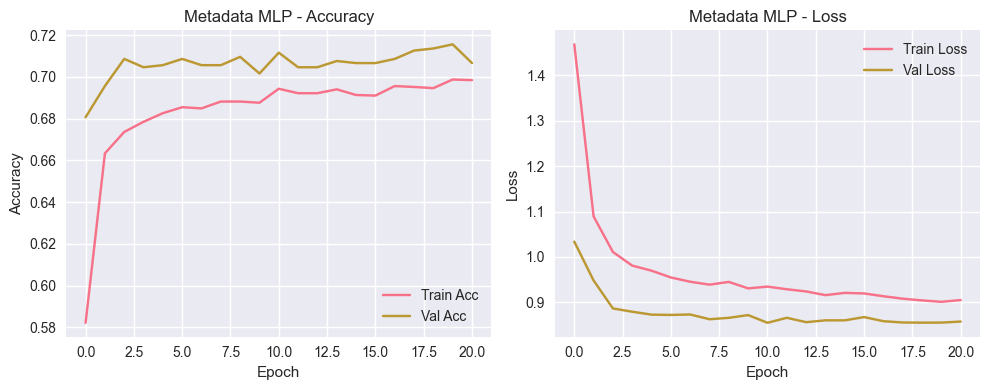

In [34]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history_meta.history['accuracy'], label='Train Acc')
plt.plot(history_meta.history['val_accuracy'], label='Val Acc')
plt.title("Metadata MLP - Accuracy")
plt.xlabel("Epoch"); plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_meta.history['loss'], label='Train Loss')
plt.plot(history_meta.history['val_loss'], label='Val Loss')
plt.title("Metadata MLP - Loss")
plt.xlabel("Epoch"); plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

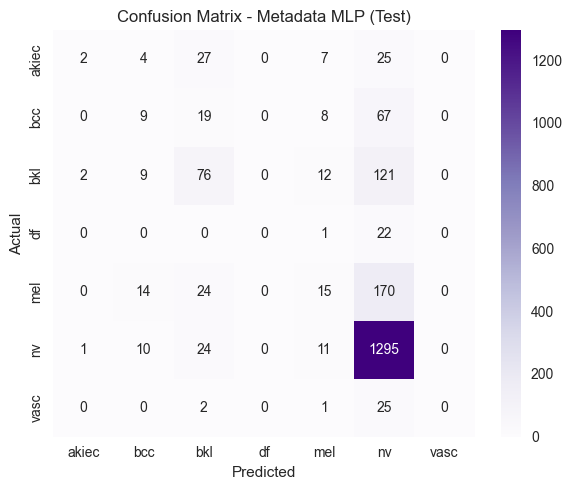

In [35]:
cm_meta = confusion_matrix(test_true_meta_cls, test_pred_meta_cls)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_meta, annot=True, fmt='d', cmap='Purples',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix - Metadata MLP (Test)")
plt.xlabel("Predicted"); plt.ylabel("Actual")
plt.tight_layout()
plt.show()

In [36]:
# === Image MLP ===
print("\n=== Training MLP on Image ===")
input_dim_img = train_images_flat.shape[1]
model_img = create_mlp_model(input_dim_img, num_classes)

history_img = model_img.fit(
    train_images_flat, train_labels,
    validation_data=(val_images_flat, val_labels),
    epochs=100,
    batch_size=BATCH_SIZE,
    callbacks=callbacks,
    verbose=1
)


=== Training MLP on Image ===
Epoch 1/100
220/220 ━━━━━━━━━━━━━━━━━━━━ 53s 208ms/step - accuracy: 0.4370 - loss: 1.7997 - val_accuracy: 0.6836 - val_loss: 0.9843 - learning_rate: 0.0010
Epoch 2/100
220/220 ━━━━━━━━━━━━━━━━━━━━ 44s 201ms/step - accuracy: 0.6563 - loss: 1.0140 - val_accuracy: 0.6946 - val_loss: 0.8805 - learning_rate: 0.0010
Epoch 3/100
220/220 ━━━━━━━━━━━━━━━━━━━━ 45s 202ms/step - accuracy: 0.6768 - loss: 0.9072 - val_accuracy: 0.6936 - val_loss: 0.8565 - learning_rate: 0.0010
Epoch 4/100
220/220 ━━━━━━━━━━━━━━━━━━━━ 45s 205ms/step - accuracy: 0.6857 - loss: 0.8840 - val_accuracy: 0.6976 - val_loss: 0.8297 - learning_rate: 0.0010
Epoch 5/100
220/220 ━━━━━━━━━━━━━━━━━━━━ 44s 199ms/step - accuracy: 0.6911 - loss: 0.8673 - val_accuracy: 0.7056 - val_loss: 0.8454 - learning_rate: 0.0010
Epoch 6/100
220/220 ━━━━━━━━━━━━━━━━━━━━ 44s 200ms/step - accuracy: 0.7030 - loss: 0.8196 - val_accuracy: 0.7016 - val_loss: 0.8115 - learning_rate: 0.0010
Epoch 7/100
220/220 ━━━━━━━━━━━━━

In [37]:
# === Evaluation: Image ===
val_pred_img = model_img.predict(val_images_flat)
test_pred_img = model_img.predict(test_images_flat)

val_pred_img_cls = np.argmax(val_pred_img, axis=1)
val_true_img_cls = np.argmax(val_labels, axis=1)

test_pred_img_cls = np.argmax(test_pred_img, axis=1)
test_true_img_cls = np.argmax(test_labels, axis=1)

val_acc_img = np.mean(val_pred_img_cls == val_true_img_cls)
test_acc_img = np.mean(test_pred_img_cls == test_true_img_cls)

print(f"Image Val Accuracy: {val_acc_img:.4f}")
print(f"Image Test Accuracy: {test_acc_img:.4f}")

print("\nClassification Report (Image Val):")
print(classification_report(val_true_img_cls, val_pred_img_cls, target_names=label_encoder.classes_))

print("\nClassification Report (Image Test):")
print(classification_report(test_true_img_cls, test_pred_img_cls, target_names=label_encoder.classes_))

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
Image Val Accuracy: 0.7375
Image Test Accuracy: 0.7424

Classification Report (Image Val):
              precision    recall  f1-score   support

       akiec       0.26      0.21      0.23        33
         bcc       0.37      0.37      0.37        51
         bkl       0.57      0.46      0.51       110
          df       0.20      0.08      0.12        12
         mel       0.46      0.35      0.40       111
          nv       0.84      0.92      0.88       671
        vasc       0.67      0.29      0.40        14

    accuracy                           0.74      1002
   macro avg       0.48      0.38      0.42      1002
weighted avg       0.71      0.74      0.72      1002


Classification Report (Image Test):
              precision    recall  f1-score   support

       akiec       0.37      0.38      0.38        65
         bcc       0.47      0.46      0.47       103
         bkl       0.49      0.4

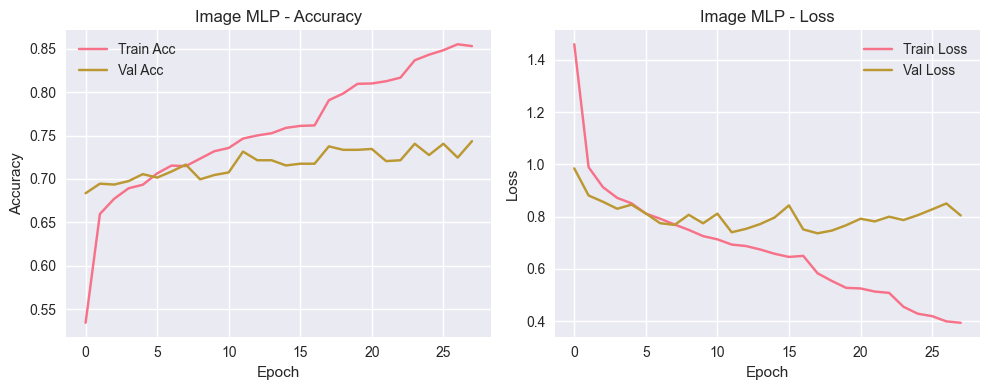

In [38]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history_img.history['accuracy'], label='Train Acc')
plt.plot(history_img.history['val_accuracy'], label='Val Acc')
plt.title("Image MLP - Accuracy")
plt.xlabel("Epoch"); plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_img.history['loss'], label='Train Loss')
plt.plot(history_img.history['val_loss'], label='Val Loss')
plt.title("Image MLP - Loss")
plt.xlabel("Epoch"); plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

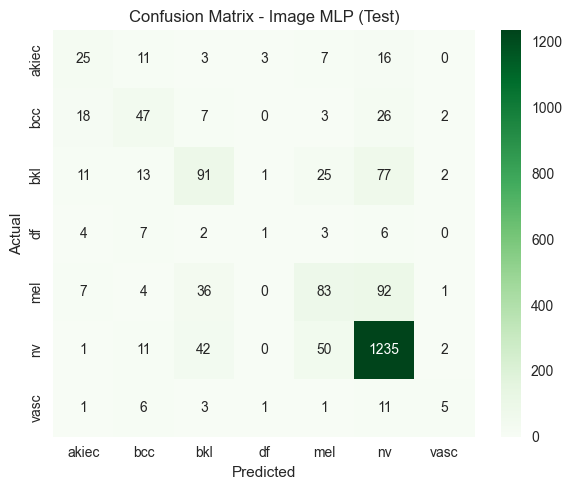

In [39]:
cm_img = confusion_matrix(test_true_img_cls, test_pred_img_cls)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_img, annot=True, fmt='d', cmap='Greens',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix - Image MLP (Test)")
plt.xlabel("Predicted"); plt.ylabel("Actual")
plt.tight_layout()
plt.show()

In [23]:
# Setting up callbacks and training (Combined)
print("=== Training MLP Model ===")

# Callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-7)
]

# Train the model
history = model.fit(
    train_combined, train_labels,
    validation_data=(val_combined, val_labels),
    epochs=100,
    batch_size=BATCH_SIZE,
    callbacks=callbacks,
    verbose=1
)

=== Training MLP Model ===
Epoch 1/100
220/220 ━━━━━━━━━━━━━━━━━━━━ 149s 510ms/step - accuracy: 0.4364 - loss: 1.8386 - val_accuracy: 0.6826 - val_loss: 0.9601 - learning_rate: 0.0010
Epoch 2/100
220/220 ━━━━━━━━━━━━━━━━━━━━ 116s 385ms/step - accuracy: 0.6483 - loss: 1.0198 - val_accuracy: 0.6926 - val_loss: 0.8771 - learning_rate: 0.0010
Epoch 3/100
220/220 ━━━━━━━━━━━━━━━━━━━━ 85s 383ms/step - accuracy: 0.6727 - loss: 0.9331 - val_accuracy: 0.6956 - val_loss: 0.8400 - learning_rate: 0.0010
Epoch 4/100
220/220 ━━━━━━━━━━━━━━━━━━━━ 61s 279ms/step - accuracy: 0.6886 - loss: 0.8709 - val_accuracy: 0.6886 - val_loss: 0.8240 - learning_rate: 0.0010
Epoch 5/100
220/220 ━━━━━━━━━━━━━━━━━━━━ 68s 309ms/step - accuracy: 0.6909 - loss: 0.8505 - val_accuracy: 0.7016 - val_loss: 0.8269 - learning_rate: 0.0010
Epoch 6/100
220/220 ━━━━━━━━━━━━━━━━━━━━ 74s 336ms/step - accuracy: 0.7161 - loss: 0.7897 - val_accuracy: 0.6956 - val_loss: 0.8008 - learning_rate: 0.0010
Epoch 7/100
220/220 ━━━━━━━━━━━━━━━

In [ ]:
# Evaluating the model
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

print("=== Model Evaluation ===")

# Predictions
val_predictions = model.predict(val_combined)
val_pred_classes = np.argmax(val_predictions, axis=1)
val_true_classes = np.argmax(val_labels, axis=1)

test_predictions = model.predict(test_combined)
test_pred_classes = np.argmax(test_predictions, axis=1)
test_true_classes = np.argmax(test_labels, axis=1)

# Validation metrics
val_accuracy = np.mean(val_pred_classes == val_true_classes)
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Test metrics
test_accuracy = np.mean(test_pred_classes == test_true_classes)
print(f"Test Accuracy: {test_accuracy:.4f}")

print("\nClassification Report (Validation Set):")
print(classification_report(val_true_classes, val_pred_classes, 
                          target_names=label_encoder.classes_))

print("\nClassification Report (Test Set):")
print(classification_report(test_true_classes, test_pred_classes, 
                          target_names=label_encoder.classes_))

=== Model Evaluation ===
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step
Validation Accuracy: 0.7615
Test Accuracy: 0.7668

Classification Report (Validation Set):
              precision    recall  f1-score   support

       akiec       0.35      0.24      0.29        33
         bcc       0.47      0.31      0.38        51
         bkl       0.54      0.55      0.55       110
          df       0.67      0.17      0.27        12
         mel       0.50      0.32      0.39       111
          nv       0.85      0.95      0.90       671
        vasc       0.44      0.29      0.35        14

    accuracy                           0.76      1002
   macro avg       0.55      0.40      0.44      1002
weighted avg       0.73      0.76      0.74      1002


Classification Report (Test Set):
              precision    recall  f1-score   support

       akiec       0.47      0.38      0.42        65
         bcc       0.64      0.48      0.54       103
         

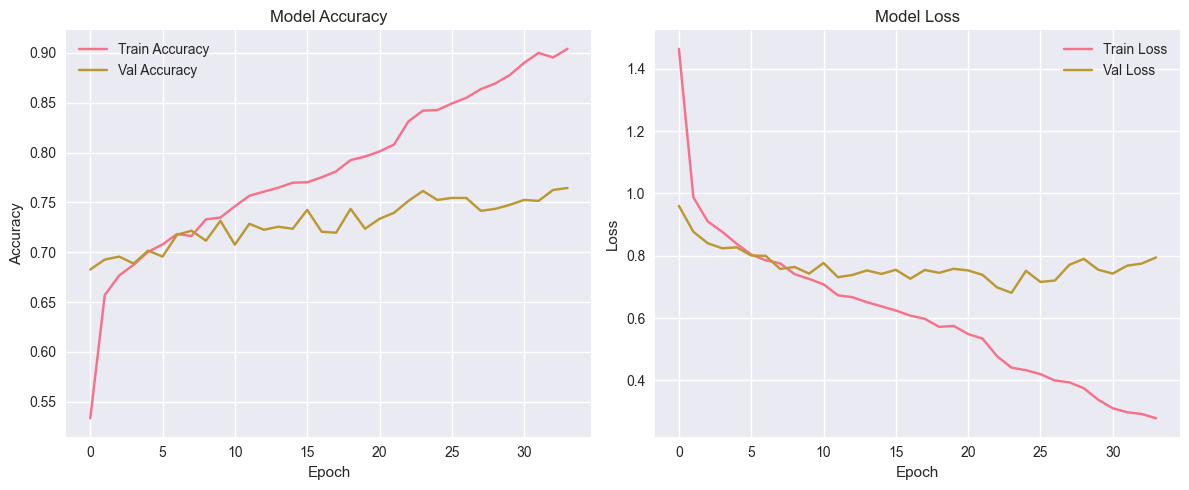

In [28]:
# Plotting Model Accuracy and Model Loss
plt.figure(figsize=(12, 5))

# Model Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Model Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

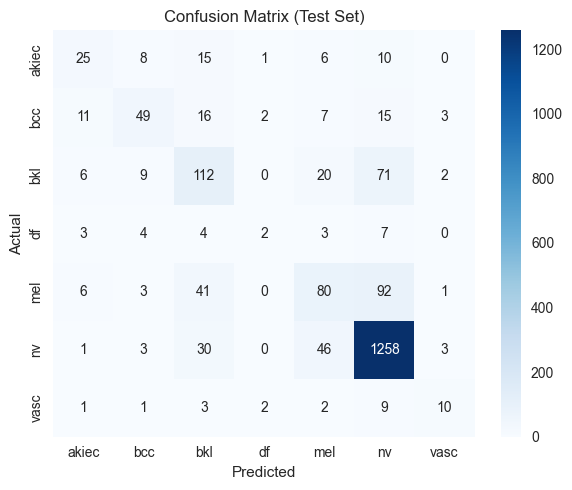

In [29]:
# Confusion Matrix
cm = confusion_matrix(test_true_classes, test_pred_classes)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix (Test Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()